<center><b>Local Search - SAT</b></center><br>
Finding solution to the SAT (Boolean Satisfiability Problem or Propositional Satisfiability Problem) using Local Search.

The code below reads in a "problem" file which contains a set of clauses connected by 'AND' logic gates. Each clause can have multiple variables, they are connected by 'OR' logic gates.
After that, it will attempt to find value for each variable by changing only 1 variable in each Step in a hope that it will satisfy all clauses.
The issue with Local Search is that in can get stuck in 'Local Optima' to get around this the system will try multiple restarts each with random initial solutions.

In [1]:
# Imports
import random
import copy
import os
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting import plot, plot_parametric

%matplotlib inline

In [2]:
class SatProblemSolver():
    """
    SAT problem solver using Local Search
    On init a problem file is loaded in and the clauses are read.
    Call SolveSATProblem to solve the problem 
    """
    def __init__(self, problemFilename):
        self.loadProblemData(problemFilename)
        self.TotalCosts = []
        self.SolvedInNumSteps = 0
        self.SolvedInNumTries = 0
        
    def loadProblemData(self, problemFilename):
        """
        Loads in the problem file. It requires the file to be setup
        in a very specific way. The file should contain:
        - number of variables used
        - clauses
        """
        file = open(problemFilename, 'r')
        if file == None:
            print('ERROR - File not found: {}'.format(problemFilename))
            return
        
        self.numberOfVars = 0
        self.numberOfClauses = 0
        self.clauses = None
        
        foundProblemLine = False
        clauseIndex = 0
        for line in file:
            words = line.split()
            if not foundProblemLine:
                if words[0] == 'p':
                    self.numberOfVars = int(words[2])
                    self.numberOfClauses = int(words[3])
                    self.clauses = [None] * self.numberOfClauses
                    foundProblemLine = True
                    print('Found problem with {} variables and {} clauses'.format(self.numberOfVars, self.numberOfClauses))
            elif words[0] == '%':
                break
            else:
                words = [int(i) for i in words] # convert from string to int
                self.clauses[clauseIndex] = words[:-1]
                clauseIndex += 1
        pass
    
    def PrintProblem(self):
        """
        Prints the SAT problem clauses in a CPP style formatting
        """
        line = ""
        for i in range(self.numberOfClauses):
            line += '('
            clause = self.clauses[i]
            for c in range(len(clause)):
                var = clause[c]
                varIndex = abs(var)-1 # -1 because array starts from 0
                varBool = var > 0
                if varBool == False:
                    line += '!'
                line += chr(varIndex + 97)
                if c < len(clause)-1:
                    line += ' || '
            line += ')'
            if i < self.numberOfClauses-1:
                line += ' && '
        print(line)
    
    def GetCostOfF(self, F):
        """
        Calculates the fintess of the passed in solution
        """
        fitness = 0
        for i in range(self.numberOfClauses):
            clause = self.clauses[i]
            c = 0
            solved = False
            while(not solved and c < len(clause)):
                var = clause[c]
                varIndex = abs(var)-1 # -1 because array starts from 0
                varBool = var > 0
                if F[varIndex] == varBool:
                    solved = True
                c += 1
            if solved == False:
                fitness += 1
        return fitness
    
    def CreateInitialSolution(self):
        """
        Randomly assigns True or False to the solution variables
        """
        F = [False] * self.numberOfVars
        for i in range(self.numberOfVars):
            if random.random() < 0.5:
                F[i] = True
                
        return F
    
    def SolveSATProblem(self, maxTries, maxSteps):
        """
        Tries to solve the SAT problem. It can stuck in local optima that is why restarts are required
        maxTries - is the maximum number of times the algorithm will restart
        maxSteps - the maximum number of times the algorithm will try to improve its solution
        """
        F = None
        
        self.TotalCosts = []
        
        for t in range(maxTries):
            F = self.CreateInitialSolution()
            
            for s in range(maxSteps):
                currentCost = self.GetCostOfF(F)
                self.TotalCosts.append(currentCost)
                if currentCost == 0:
                    self.SolvedInNumTries = t
                    self.SolvedInNumSteps = s
                    print('Solved in try {}, step: {}'.format(t, s))
                    return F
                stuck = True
                for v in range(self.numberOfVars):
                    tempF = copy.deepcopy(F)
                    tempF[v] = not tempF[v]
                    if self.GetCostOfF(tempF) < currentCost:
                        F = tempF
                        stuck = False
                
                # if we can't find a better solution, just early out and restart
                if stuck == True:
                    break
        return None


In [3]:
maxTries = 50 # number of times the algorithm will reset and try again if needed
maxSteps = 40 # number of times each try will try to improve the solution

path = 'data/SATdata/Inst/'
problemFiles = os.listdir(path)

Solving first SAT problem(uf20-01.cnf) with maxTries: 50 and maxSteps: 40
Found problem with 20 variables and 91 clauses
SAT problem to solve:
(d || !r || s) && (c || r || !e) && (!e || !h || !o) && (!t || g || !p) && (j || !m || !g) && (!l || !i || q) && (q || s || e) && (!p || i || o) && (k || !e || !n) && (r || !j || m) && (!c || k || l) && (!f || !q || !h) && (!r || n || a) && (!s || !o || j) && (l || r || !s) && (!h || d || g) && (!h || !i || d) && (g || q || !o) && (l || !g || !n) && (!j || !k || h) && (b || !o || !k) && (i || f || a) && (!k || t || !q) && (i || !o || m) && (l || !g || !q) && (!r || !b || t) && (t || l || d) && (s || k || n) && (!p || r || !d) && (!a || !q || !s) && (!m || o || j) && (!l || !n || !m) && (l || !n || !g) && (!g || p || j) && (f || j || g) && (t || n || !p) && (!s || q || k) && (!g || a || !t) && (!e || l || o) && (!d || !i || !m) && (l || !k || !g) && (!e || s || !h) && (a || p || q) && (t || !n || !o) && (m || !d || j) && (n || g || j) && (!e || i

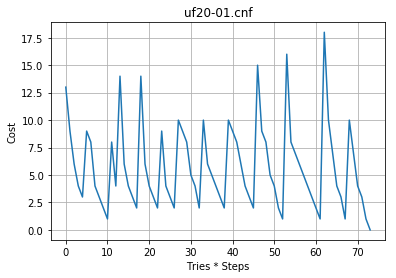

In [4]:
# Solving the first problem with extra details

problemFile  = path + problemFiles[0]
print('Solving first SAT problem({}) with maxTries: {} and maxSteps: {}'.format(problemFiles[0], maxTries, maxSteps))
solver = SatProblemSolver(problemFile)
print('SAT problem to solve:')
solver.PrintProblem()
solution = solver.SolveSATProblem(maxTries, maxSteps)

print('SAT solution is:')
if solution != None:
    for v in range(solver.numberOfVars):
        print('{} = {}'.format(chr(v+97), solution[v]))
else:
    print('Could NOT solve problem')
    
fig = plt.figure()
axes = fig.add_subplot(111)
axes.set_title(problemFiles[0])
axes.set_ylabel('Cost')
axes.set_xlabel('Tries * Steps')
axes.grid()
axes.plot(solver.TotalCosts)


Trying to solve problem: uf20-01.cnf in maxTries: 50, maxSteps: 40
Found problem with 20 variables and 91 clauses
Solved in try 13, step: 6
Solution is: [True, False, False, False, False, True, False, False, True, False, False, False, False, True, True, False, True, False, False, True]

Trying to solve problem: uf20-02.cnf in maxTries: 50, maxSteps: 40
Found problem with 20 variables and 91 clauses
Solved in try 0, step: 5
Solution is: [True, False, False, False, False, False, True, True, True, False, False, False, False, True, False, True, False, False, False, False]

Trying to solve problem: uf20-03.cnf in maxTries: 50, maxSteps: 40
Found problem with 20 variables and 91 clauses
Solved in try 2, step: 8
Solution is: [True, True, True, True, False, True, True, True, True, True, True, False, True, False, False, True, True, True, False, True]

Trying to solve problem: uf20-04.cnf in maxTries: 50, maxSteps: 40
Found problem with 20 variables and 91 clauses
Solved in try 6, step: 5
Soluti

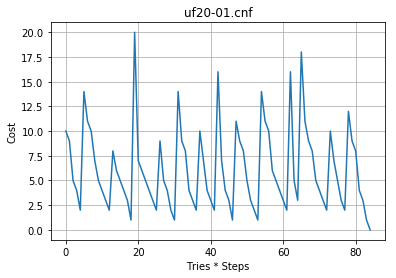

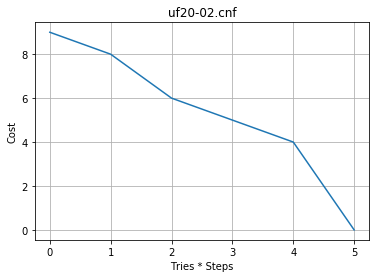

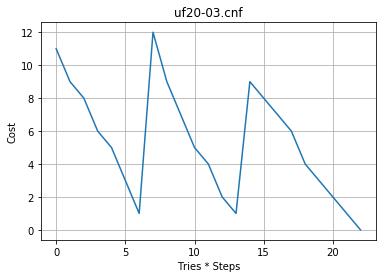

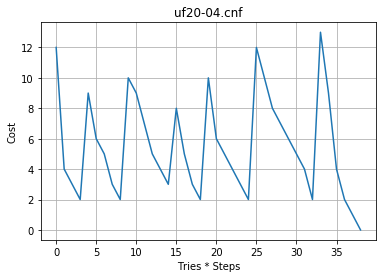

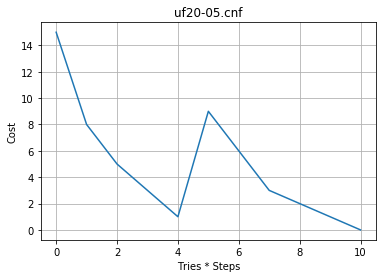

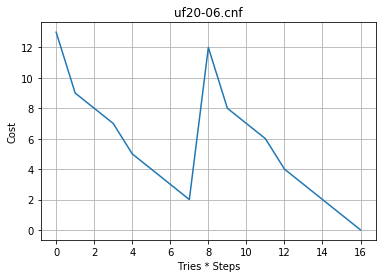

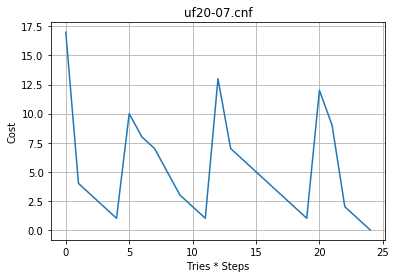

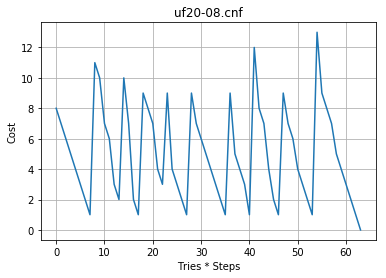

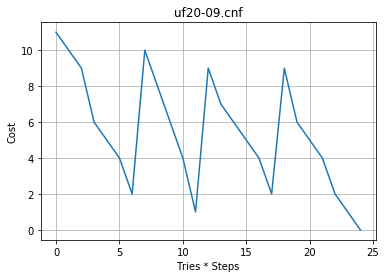

In [5]:
# Solving all SAT problems

solvedProblemsCounter = 0
solvedInTriesAverage = 0
solvedInStepsAverage = 0
for problem in problemFiles:
    problemFile  = path + problem

    print('Trying to solve problem: {} in maxTries: {}, maxSteps: {}'.format(problem, maxTries, maxSteps))
    solver = SatProblemSolver(problemFile)
    #solver.PrintProblem()

    solution = solver.SolveSATProblem(maxTries, maxSteps)
    if solution != None:
        solvedProblemsCounter += 1
        solvedInTriesAverage += solver.SolvedInNumTries
        solvedInStepsAverage += solver.SolvedInNumSteps
    
    print('Solution is: {}'.format(solution))
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.set_title(problem)
    axes.set_ylabel('Cost')
    axes.set_xlabel('Tries * Steps')
    axes.grid()
    axes.plot(solver.TotalCosts)
    print('')
    
print('Solved {} out of {}'.format(solvedProblemsCounter, len(problemFiles)))
solvedInTriesAverage = solvedInTriesAverage / solvedProblemsCounter
solvedInStepsAverage = solvedInStepsAverage / solvedProblemsCounter
print('On Average solved in {} tries and {} steps'.format(round(solvedInTriesAverage,2), round(solvedInStepsAverage,2)))
